In [7]:
## Práctica de Numpy hecha con datos tomados de tracker.
# Integrantes
#Alejandro Gómez Serrato


In [8]:
import numpy as np
import scipy as cp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import integrate

In [9]:
rango = np.genfromtxt('accel.txt',dtype = float)#skip_header = empieza a contar desde la columna 5, missing_values = cambia el tipo de variable
t = rango[:,0]
a = rango[:,1]

In [10]:
def trapezoid(dx,f):
    """
    dx = time interval
    f = evaluated parameters 
    Caclulates the integral of a set of values ruled by an implicit function using the trapezoid rule. 
    f = set of values(tabular data of the acceleration)
    """
    result = (dx/2)*(2*np.cumsum(f))#cummulative trapezoid rule
    result[-1:0] = result[-1:0]/2 #first and last term divided by two 
    return result


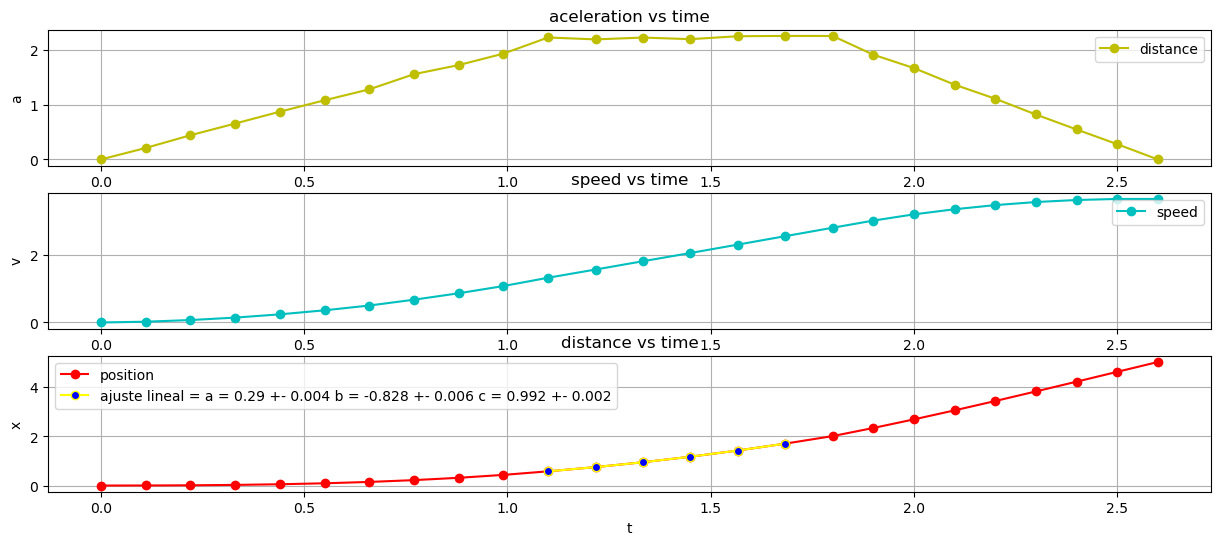

In [11]:
delta = t[1] - t[0]
v = trapezoid(delta,a)
x = trapezoid(delta,v)
xcons = x[10:16]#constant acceleration interval
tcons = t[10:16]#constant time interval 
pos = lambda t,xo,vo,a:xo + vo*t+ a*pow(t,2)
popt, pcov = cp.optimize.curve_fit(pos,tcons,xcons)#ajuste lineal
to,xo,vo = popt # parameters
err_a, err_b, err_c = np.round(np.sqrt(np.diag(pcov)),3)#errors 
fig,ax = plt.subplots(3,1,figsize=(15,6))
ax[0].plot(t,a,'yo-',label = 'distance')
ax[0].set_xlabel("t")
ax[0].set_ylabel("a")
ax[0].set_title("aceleration vs time")
ax[0].legend()
ax[0].grid()
ax[1].plot(t,v,'co-',label = 'speed')
ax[1].set_xlabel("t")
ax[1].set_ylabel("v")
ax[1].set_title("speed vs time")
ax[1].legend()
ax[1].grid()
ax[2].plot(t,x,'ro-',label = 'position')
ax[2].set_xlabel("t")
ax[2].set_ylabel("x")
ax[2].set_title("distance vs time")
ax[2].plot(tcons,pos(tcons,*popt),label = f'ajuste lineal = a = {round(to,3)} +- {err_a} b = {round(xo,3)} +- {err_b} c = {round(vo,3)} +- {err_c}',color =  'yellow' ,marker = 'o',markerfacecolor='blue')
ax[2].legend()
ax[2].grid()
plt.show()


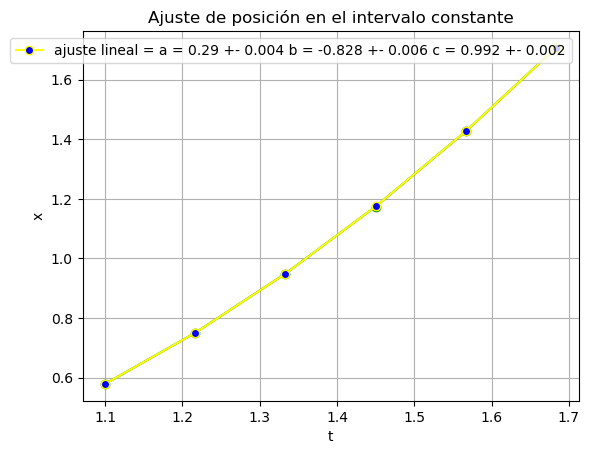

In [12]:
ax = plt.subplot()
ax.plot(tcons,xcons,'go-')
ax.plot(tcons,pos(tcons,*popt),label = f'ajuste lineal = a = {round(to,3)} +- {err_a} b = {round(xo,3)} +- {err_b} c = {round(vo,3)} +- {err_c}',color =  'yellow' ,marker = 'o',markerfacecolor='blue')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('Ajuste de posición en el intervalo constante')
ax.legend()
ax.grid()
plt.show()